# Innholdsliste

### Oppgavebeskrivelse

### 1 Innledning

1.1 Hva er bompengeavgift, og hvorfor er den blitt innført? 

1.2 Hvor ellers i Norge er tiltaket i bruk? 

1.3 Hvilken erfaringer er gjort med bompenger?

1.4 Utredningens struktur.

### 2 Trafikkbildet i Tromsø før og etter innføringen av bompenger.

2.1 Bilisters atferd før og etter innføringen.

2.2 Hvor mange flere sykler i 2023?

2.3 Biltrafikken til og fra Tromsøya

2.4 Brotrafikken etter innføringen av bompenger

2.5 Påstigende på buss

### 3 Bilisters tilpasning til bompenger

3.1 Bilisters budsjettlinje og mulighetsområder før og etter bompenger (Økte kostnader)

3.2 Konsumentens tilpassing (Stone-Geary)


### 4 Konklusjon

### 5 Litteraturliste

5.1 Kildeliste

5.2 Data

## Oppgavebeskrivelse

Jeg har fått i oppgave å se på trafikkbildet i Tromsø, se hvordan konsumentene har tilpasset seg bompengeavgiften som ble innført 5. Januar 2023, og forsøke å gi leseren et bedre innblikk i hvorfor det er tatt i bruk. Her vil jeg komme inn på hva en bompengeavgift er, hvordan det er strukturert og hvordan spesifikt Tromsø har tatt i mot den her avgiften som tidvis er ganske kontroversiell.

## 1 Innledning

#### 1.1 Hva er bompengeavgift, og hvorfor er den blitt innført?

Bompenger er en avgift som betales av kjøretøy og eller gående som vil bli brukt til en vei, bro, tunnel eller lignende. Tradisjonelt har veiene vært fysisk sperret av en bom etablert for dette formålet, men dagens bompengeanlegg har automatisk innkreving, slik at kjøretøyene slipper å stoppe. [2] 

Hovedformålet med bompengeordningen er å finansiere planlegging og bygging av offentlig vei for å få en raskere utbygging av infrastruktur. Dessuten kan bompengene på visse vilkår brukes til investering i faste anlegg for kollektivtrafikk på jernbane. Som en del av en plan for et helhetlig og samordnet transportsystem i et byområde, kan bompengene brukes til tiltak for å drifte kollektivtrafikk og bidra til utbygging av gang-og sykkelvei. [1] 

#### 1.2 Hvor ellers i Norge er tiltaket i bruk?

Tall fra 2021 viser at det var 61 prosjekter som krevde inn bompenger i 338 bomstasjoner fordelt over landet. [1] Det er i hovedsak midt og sør-Norge som står for flest antall bomstasjoner, mens det i Nord er noe mindre, selv med en utvikling i antall stasjoner de siste årene. 

#### 1.3 Hvilken erfaringer er gjort med bompenger?


Bruk av bompenger for å finansiere veibygging har lang tradisjon i Norge. Betaling for bruk av veinettet, i særs broer, oppsto for flere hundre år siden. [2] Fra 1980-årene har omfanget av bompengefinansiering økt. Det skyldes blant annet en sterkere trafikkvekst enn forutsett og det ble et større behov for flere veiinvesteringer. [1] 

#### 1.4 Utredningens struktur

Takstretningslinjene er rammene for takst- og rabattstrukturen for bompengeinnkreving på offentlig veg. Takstretningslinjene er fastsatt på bakgrunn av bestemmelser og føringer gitt av Stortinget og
Samferdselsdepartementet. [3]

Det benyttes to takstgrupper.


Takstgruppe 1: For kjøretøy med tillatt totalvekt til og med 3500 kg, samt kjøretøy i
kjøretøykategori M1 med elektronisk brikke og gyldig avtale. M1 er biler for persontransport
med maksimum åtte sitteplasser i tillegg til førersetet og omfatter bobiler, campingbiler og
enkelte større personbiler.

Takstgruppe 2: Takstgruppe 2: Kjøretøy med tillatt totalvekt over 3500 kg, ekskl. kjøretøy i kjøretøykategori
M1 med elektronisk brikke og gyldig avtale

Det skal heller ikke betales bompenger for tilhengere. [3]


## 2 Trafikkbildet i Tromsø før og etter innføring av bompenger

In [8]:
#Laster inn nødvendige pakker 
from matplotlib import pyplot as plt 
import pandas as pd 
import sympy as sp
import seaborn as sns
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates



### 2.1 Hvordan har trafikken utviklet seg på tromsøya siden innføringen av bompenger?


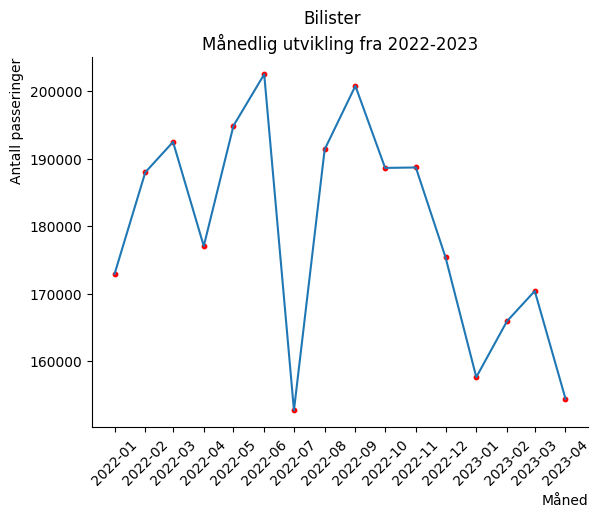

In [64]:
#Lager datasett av csv koden som er lagret på github
df_tromsøya=pd.read_csv("https://raw.githubusercontent.com/Markusbentsen/SOK1006/main/Mappeoppgaver/Mappeoppgave2/Data/-1435416295_mdt_2022_2023.csv",encoding="latin1", sep=";")

#Fjerner alle observasjoner bortsett fra Totalt
df_tromsøya = df_tromsøya.loc[df_tromsøya['Felt'] == 'Totalt']

#Lager datovariabel
df_tromsøya['Dato'] = df_tromsøya.apply(lambda row: pd.to_datetime(f"{row['År']}-{row['Måned']:02}-01"), axis=1)

#Grupperer alle veiene
df_tromsøya_total = df_tromsøya.groupby('Dato')['Trafikkmengde'].sum()


#Resetter posisjon
df_tromsøya_total = df_tromsøya_total.reset_index()

#Gjør om til datetime
df_tromsøya_total["Dato"] = pd.to_datetime(df_tromsøya_total["Dato"])

#Fjerner tid bak dato da man kun trenger fulle dager/måneder
df_tromsøya_total['Dato'] = df_tromsøya_total['Dato'].dt.date



#Lager en graf
def create_ax():
  fig, ax = plt.subplots()
  ax.set_ylabel('Antall passeringer', loc='top')
  ax.set_xlabel('Måned', loc='right')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  return fig, ax
fig, ax = create_ax()


#Plotter graf
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.suptitle('Bilister')
plt.title('Månedlig utvikling fra 2022-2023', color='Black')
plt.plot(df_tromsøya_total["Dato"], df_tromsøya_total["Trafikkmengde"])
ax.scatter(df_tromsøya_total["Dato"], df_tromsøya_total["Trafikkmengde"], color='red', s=10)
date_fmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()



Figuren viser antall bilister som kjører på veiene på Tromsøya fra januar 2022 til mars 2023, og som forventet ser vi en stor reduksjon i antall bilister i sommermånedene, som faller sammen med fellesferien i Norge. 

Vi kan også observere et stort fall i antall bilister rett før nyttår og inn på nyåret. Dette kan skyldes ferieavvikling og ferieavslutning. En annen interessant observasjon er fallet i antall bilister etter at bompengeavgiften ble innført. Den trenden fortsetter så langt som dataene strekker, og kan indikere at innføringen av avgiften har hatt en betydelig effekt på antall bilister.

### 2.2 Hvor mange flere sykler i 2023?


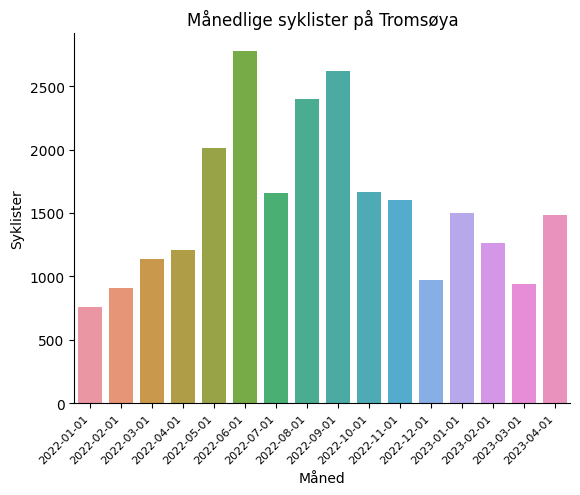

In [65]:
#Lager datasett av csv koden som er lagret på github
df_sykkel=pd.read_csv("https://raw.githubusercontent.com/Markusbentsen/SOK1006/main/Mappeoppgaver/Mappeoppgave2/Data/sykkel.csv",encoding="latin1", sep=";")

#Fjerner alle observasjoner bortsett fra Totalt
df_sykkel = df_sykkel.loc[df_sykkel['Felt'] == 'Totalt']

#Lager datovariabel
df_sykkel['Dato'] = df_sykkel.apply(lambda row: pd.to_datetime(f"{row['År']}-{row['Måned']:02}-01"), axis=1)

#Grupperer alle veiene
df_sykkel = df_sykkel.groupby('Dato')['Trafikkmengde'].sum()

#Resetter posisjon
df_sykkel = df_sykkel.reset_index()

#Gjør om til datetime og velger kun ut  dato
df_sykkel["Dato"] = pd.to_datetime(df_sykkel["Dato"])

#Fjerner tid bak dato
df_sykkel['Dato'] = df_sykkel['Dato'].dt.date

#Lager grafen
def create_ax2(): 
    fig, ax = plt.subplots()
    ax.set_ylabel('Antall reiser', loc='top')
    ax.set_xlabel('År', loc='right')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    return fig, ax
fig3, ax = create_ax2()

#Plotter grafen
sns.barplot(data=df_sykkel, x='Dato', y='Trafikkmengde').set(title='Månedlige syklister på Tromsøya')
ax.set(xlabel='Måned', ylabel='Syklister')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='8')
fig.canvas.draw_idle()


Figuren viser antall syklister på Tromsøya fra januar 2022 til mars 2023 og gir noen interessante funn. Det ser ut til å være flere syklister på veiene i sommermånedene, noe som er vanlig. Imidlertid viser dataene også en markant økning i antall syklister etter innføringen av bompengeavgiften.

I januar 2023 var det nesten dobbelt så mange syklister på veiene som i januar 2022, noe som kan tyde på at flere velger sykkelen som sitt foretrukne transportmiddel etter innføringen av avgiften. Dette mønsteret fortsetter utover året, med en økning i antall syklister sammenlignet med samme periode i 2022, med unntak av en liten nedgang i mars 2023.

Det tyder på at innføring av bompengeavgiften kan ha en positiv effekt på miljø og trafikkforholdet på Tromsøya, men det er enda litt tidlig å si om det vedvarer.

### 2.3 Biltrafikken til og fra Tromsøya


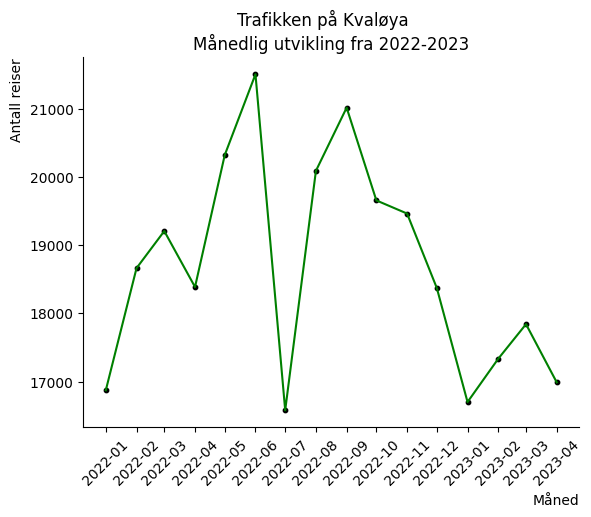

In [66]:
#Lager datasett av csv koden som er lagret på github
df_kvaløya=pd.read_csv("https://raw.githubusercontent.com/Markusbentsen/SOK1006/main/Mappeoppgaver/Mappeoppgave2/Data/kval%C3%B8ya.csv",encoding="latin1", sep=";")

#Fjerner alle observasjoner bortsett fra Totalt
df_kvaløya = df_kvaløya.loc[df_kvaløya['Felt'] == 'Totalt']

#Lager datovariabel
df_kvaløya['Dato'] = df_kvaløya.apply(lambda row: pd.to_datetime(f"{row['År']}-{row['Måned']:02}-01"), axis=1)

#Grupperer alle veiene
df_kvaløya = df_kvaløya.groupby('Dato')['Trafikkmengde'].sum()

#Resetter posisjon
df_kvaløya = df_kvaløya.reset_index()

#Gjør om til datetime og velger kun ut dato
df_kvaløya["Dato"] = pd.to_datetime(df_kvaløya["Dato"])

#Fjerner tid bak dato
df_kvaløya['Dato'] = df_kvaløya['Dato'].dt.date

#Lager grafen
def create_ax3(): 
    fig, ax = plt.subplots()
    ax.set_ylabel('Antall reiser', loc='top')
    ax.set_xlabel('Måned', loc='right')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    return fig, ax
fig3, ax = create_ax3()

#Plotter graf
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.suptitle('Trafikken på Kvaløya')
plt.title('Månedlig utvikling fra 2022-2023', color='Black')
plt.plot(df_kvaløya["Dato"], df_kvaløya["Trafikkmengde"], color='green')
ax.scatter(df_kvaløya["Dato"], df_kvaløya["Trafikkmengde"], color='Black', s=10)
date_fmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()



Figuren ovenfor viser hvordan trafikkbildet har endret seg med kjøringer på Tromsøya etter at bompengeavgiften ble innført. Som likt med tidligere figurer ser man et stort dropp i trafikken i fellesferien og rett før nyttår, men det som er interessant å se på er hvordan trafikken tar seg opp igjen etter at avgiften er implementert. Der trafikken for bilister på Tromsøya går ned i 2023 ser vi at det har motsatt effekt for Kvaløya, der trafikken går opp. Vell og merke bare i januar og februar.

### 2.4 Brotrafikken etter innføringen av bompenger

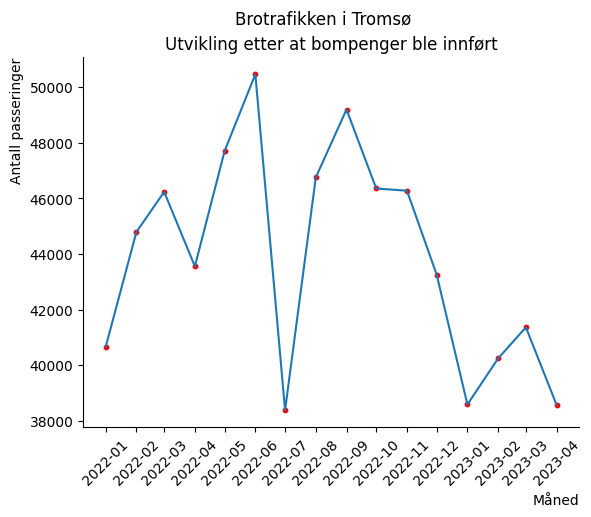

In [67]:
#Lager datasett av csv koden som er lagret på github
df_bro=pd.read_csv("https://raw.githubusercontent.com/Markusbentsen/SOK1006/main/Mappeoppgaver/Mappeoppgave2/Data/brotrafikk.csv",encoding="latin1", sep=";")

#Fjerner alle observasjoner bortsett fra Totalt
df_bro = df_bro.loc[df_bro['Felt'] == 'Totalt']

#Lager datovariabel
df_bro['Dato'] = df_bro.apply(lambda row: pd.to_datetime(f"{row['År']}-{row['Måned']:02}-01"), axis=1)

#Grupperer alle veiene
df_bro_total = df_bro.groupby('Dato')['Trafikkmengde'].sum()


#Resetter posisjon
df_bro_total = df_bro_total.reset_index()

#Gjør om til datetime
df_bro_total["Dato"] = pd.to_datetime(df_bro_total["Dato"])

#Fjerner tid bak dato
df_bro_total['Dato'] = df_bro_total['Dato'].dt.date


#Lager en graf
def create_ax():
  fig, ax = plt.subplots()
  ax.set_ylabel('Antall passeringer', loc='top')
  ax.set_xlabel('Måned', loc='right')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  return fig, ax
fig, ax = create_ax()


#Plotter graf
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.suptitle('Brotrafikken i Tromsø')
plt.title('Utvikling etter at bompenger ble innført', color='Black')
plt.plot(df_bro_total["Dato"], df_bro_total["Trafikkmengde"])
ax.scatter(df_bro_total["Dato"], df_bro_total["Trafikkmengde"], color='red', s=10)
date_fmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()

I figuren ovenfor tar vi en titt på hvor mange som benytter seg av broen og undervannstunnelen til og fra Tromsøya, grunnen til at det kan være interessant å ta med er for å se om folks vaner har endret seg noe etter at bompengeavgiften ble innført. Det kan tenkes at personer som bor enten på kvaløya eller i tromsdalen lar være å dra over til Tromsøya for dagligdagse ærend for å unngå bomstasjoner, og heller tar handling ved sin nærmeste butikk. I grafen ser man at det er en relativt god nedgang i antall billister. 

### 2.5 Påstigende på buss

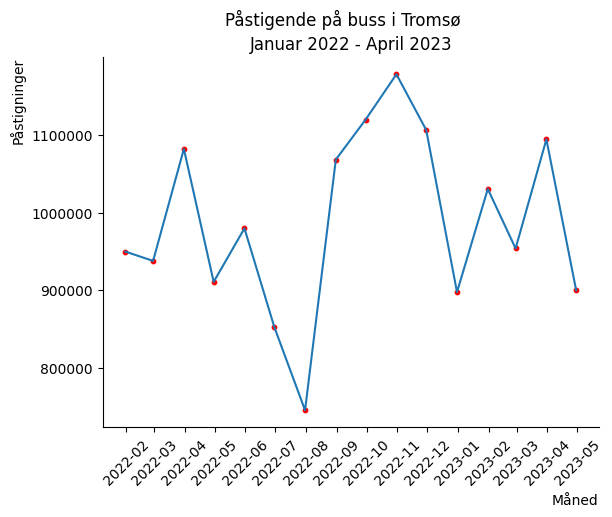

In [140]:
#Laster inn data for påstigende på buss
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv")

#Gjør om til datetime
df_buss['date'] = pd.to_datetime(df_buss['date'])

#Summerer antall påstigende
df_buss_total = df_buss.groupby('date')['Påstigende'].sum()

#Resetter indeksen
df_buss_total = df_buss_total.reset_index()

#Gjør indeks om til date
df_buss_total.set_index('date', inplace=True)

#Gjør det om til månedlige observasjoner
df_buss1 = df_buss_total['Påstigende'].resample('M').sum()

#Resetter indeks igjen
df_buss1 = df_buss1.reset_index()

#Filtrerer bort all data fra etter 30.04.2023 da det er urelevant
df_buss1 = df_buss1[df_buss1['date'] <= '2023-04-30']

#Lager en graf
def create_ax():
  fig, ax = plt.subplots()
  ax.set_ylabel('Påstigninger', loc='top')
  ax.set_xlabel('Måned', loc='right')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  return fig, ax
fig, ax = create_ax()


#Plotter graf
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')
plt.suptitle('Påstigende på buss i Tromsø')
plt.title('Januar 2022 - April 2023', color='Black')
plt.plot(df_buss1["date"], df_buss1["Påstigende"])
ax.scatter(df_buss1["date"], df_buss1["Påstigende"], color='red', s=10)
date_fmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()

#[5] Clark, D.J. (2023) Hentet 25. mai fra *Antall påstigende*. Github. https://github.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/blob/main/data/antall%20p%C3%A5stigende.csv 


Her tar vi en titt på hvor mange flere som velger å ta kollektivtransport i stedet for bilen etter innføringen av bompenger. Det har ikke vært noe særlig utvikling her, til tross for at det er mindre som bruker bilen de første månedene i 2023. Det personlig kom som en liten overraskelse da man kunne forventet at flere var villig til å ta buss for å spare penger.

## 3 Bilisters tilpasning til bompenger

Her skal vi se litt på hvordan konsumenten, altså de som kjører i Tromsø forholder seg til de økte kostnadene som en bompengeavgift utgjør. Hvordan man tilpasser seg et nytt budsjett og de forskjellige mulighetene de har. Her vil jeg ta i bruk en Stone-Geary funksjon for å vise konsumentens tilpassing. Grunnen til at jeg valgte Stone-Geary framfor en Cobb-Douglas funksjon er at den fungerer bedre til formålet den skal brukes til. Med en Stone-Geary funksjon får man valgt blant annet minimumsbehovet man trenger, i det her tilfellet minimunsbehovet for kjørte kilometer.

### 3.1 Bilisters budsjettlinje og mulighetsområder før og etter bompenger (Økte kostnader)


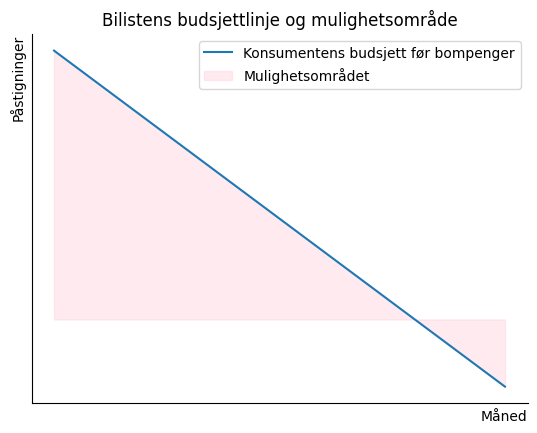

In [141]:
# definerer budsjett
x=np.linspace(0.001,100, 100)


def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

fig, ax = create_ax()

ax.plot(x, budsjett(2000, 25, 40, x), label = 'Konsumentens budsjett før bompenger')
plt.xticks([])
plt.yticks([])

ax.fill_between(x, 0, budsjett(2000, 25, 40, x), color = "pink",alpha = 0.3,label='Mulighetsområdet')

ax.set_title('Bilistens budsjettlinje og mulighetsområde')
ax.legend(loc='best');

#[4] Clark, D.J. (2023). Henter 19. mai fra *Forelesning 14 - Konsumentadferd* Github. https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 

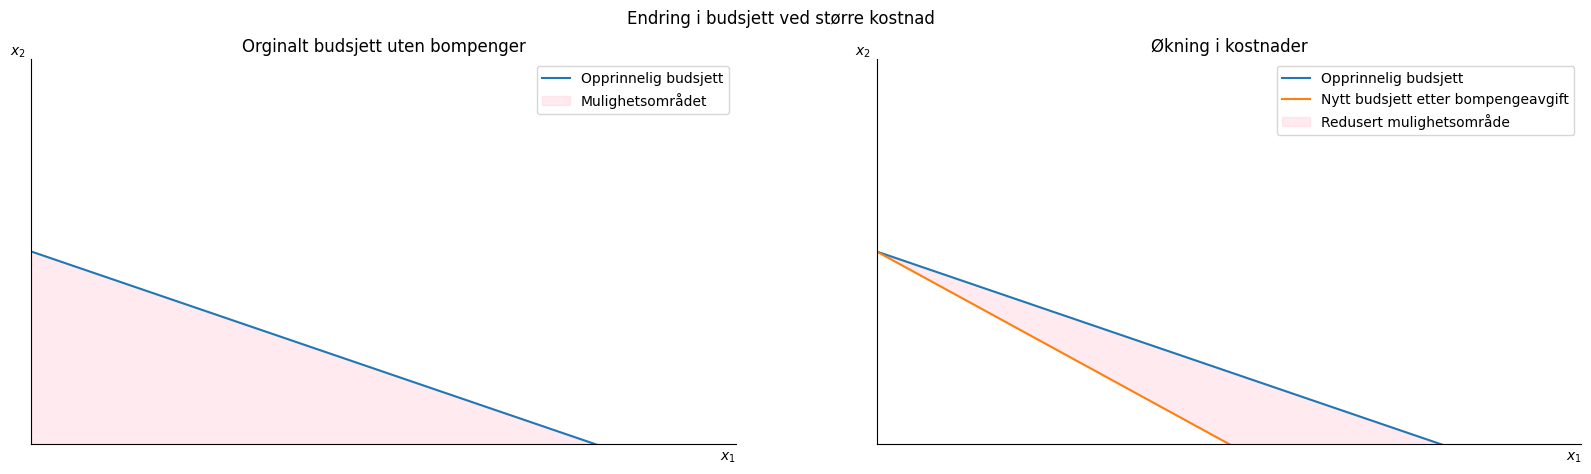

In [142]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(20,5))

#Fjerner x og y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

#plott
axs[0].plot(x, budsjett(2000, 25, 40, x), label = 'Opprinnelig budsjett')
axs[1].plot(x, budsjett(2000, 25, 40, x), label = 'Opprinnelig budsjett')

#linje for økte kostnader
axs[1].plot(x, budsjett(2000, 40, 40, x), label = 'Nytt budsjett etter bompengeavgift')

#Fill between for å fylle mellom
axs[0].fill_between(x, 0, budsjett(2000, 25, 40, x), color = "pink",alpha = 0.3,label='Mulighetsområdet')
axs[1].fill_between(x, budsjett(2000, 40, 40, x), budsjett(2000, 25, 40, x), color = "pink",alpha = 0.3,label='Redusert mulighetsområde')

#Tegner aksene
for j in range(2):
    axs[j].set_ylabel('$x_2$', loc='top', rotation=0)
    axs[j].set_xlabel('$x_1$', loc='right')
    axs[j].set(xlim=(0,100))
    axs[j].set(ylim=(0,100))
    axs[j].spines['top'].set_color('none')
    axs[j].spines['right'].set_color('none')
    axs[j].tick_params(labelleft=True)
    

#Title
fig.suptitle('Endring i budsjett ved større kostnad')
axs[0].set_title('Orginalt budsjett uten bompenger')
axs[1].set_title('Økning i kostnader')

#legend
axs[0].legend(loc='best')
axs[1].legend(loc='best');

#[4] Clark, D.J. (2023). Henter 19. mai fra *Forelesning 14 - Konsumentadferd* Github. https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 

Her er det laget en forenklet graf som viser hvordan en konsument må tilpasse seg de økte utgiftene en bompengeavgift kan påføre. Slik vi ser vil en økning i kostnad gå ut over budsjettet. Mulighetsområdet som er markert med rosa (Høyre figur) viser hvor mye mindre en konsument har til å bruke på goder etter å ha betalt avgiften. 

### 3.2 Konsumentens tilpassing (Stone-Geary)


In [143]:
#Definerer symboler
bta_1, bta_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \gamma_1 \gamma_2', real=True, positive=True)
x_1, x_2, p_1, p_2, m=sp.symbols("x_1 x_2 p_1 p_2 m", real=True, positive=True)

# etterspørsel etter gode 1
x_1_eq = gma_1 + (bta_1/p_1)*(m-p_1*gma_1-p_2*gma_2)

#Nyttefunksjon
nytte_sg = bta_1*sp.log(x_1-gma_1) + (1-bta_1)*sp.log(x_2-gma_2)

#Gode 2
x_2_eq = gma_2 + (bta_2/p_2)*(m-p_1*gma_1-p_2*gma_2)

#Definerer budsjett
def budsjett(M, x_1, p_1, p_2):
    return M/p_2 - (p_1*x_1/p_2)

#Nytte i likevekt
V = nytte_sg.subs([(x_1, x_1_eq), (x_2, x_2_eq)])

#Funksjon for indifferensekurve
U_0=sp.symbols('U_0', real = True, positive=True)
ind_k = sp.solve(nytte_sg-U_0, x_2)[0]

#Lager funksjon
def ind_k_fn(bta_1,gma_1,gma_2,x_1,U_0):
    return gma_2 + np.exp((bta_1*np.log(x_1-gma_1)-U_0)/(bta_1-1))

#Setter inn verdier
x_1_eq_num = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 2), (p_2, 2)]))
x_2_eq_num = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 2), (p_2, 2)]))
nytte_sg_num = float(V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 2), (p_2, 2)]))

#[4] Clark, D.J. (2023). Henter 19. mai fra *Forelesning 14 - Konsumentadferd* Github. https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 


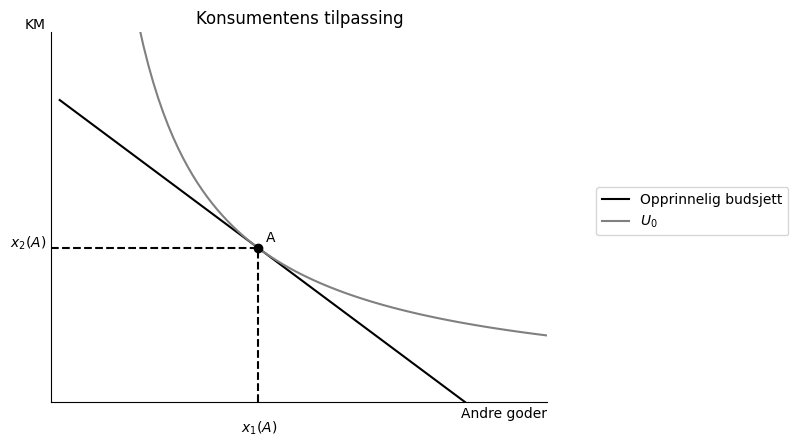

In [144]:
# lag X som sikrer x-gma>0
X = np.linspace (1.01,60,100)


fig1, ax = create_ax()
ax.set(xlim=(0,60))
ax.set(ylim=(0,60))

#Tar bort tall på x og y akse
ax.set_xticks([], [])
ax.set_yticks([], [])

#Navn på x og y akse
ax.set_ylabel('KM', loc='top', rotation=0)
ax.set_xlabel('Andre goder', loc='right', rotation=0)


ax.plot(X, budsjett(100, X, 2, 2), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(.5,1,1,X,nytte_sg_num), color='grey',label='$U_0$')

ax.vlines(x_1_eq_num, 0, x_2_eq_num, ls='dashed', color='black')
ax.hlines(x_2_eq_num, 0, x_1_eq_num, ls='dashed', color='black')

ax.annotate('$x_1(A)$', (x_1_eq_num-2, -5), annotation_clip=False)
ax.annotate('$x_2(A)$', (-5, x_2_eq_num), annotation_clip=False)
ax.annotate('A', (x_1_eq_num+1,x_2_eq_num+1))
ax.plot(x_1_eq_num, x_2_eq_num , marker='o', color='black')

#Title
ax.set_title('Konsumentens tilpassing')

#Legend
ax.legend(bbox_to_anchor=(1.5,0.6));

#[4] Clark, D.J. (2023). Henter 19. mai fra *Forelesning 14 - Konsumentadferd* Github. https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 

Figuren ovenfor viser hvordan konsumentene tilpasser seg for å oppnå maksimal tilfredshet (nytte). Dette oppnår de i punkt A, som er punktet budsjettet til konsumenten tangerer med indifferenskurven som representerer U_0 nytte, som i vårt tilfelle vil være maksimal tilfredshet oppnådd. 

Konsumenten vil da kjøre $x_1$ (A) kilometer totalt og bruke totalt $x_2$ (A) kroner på andre goder. 


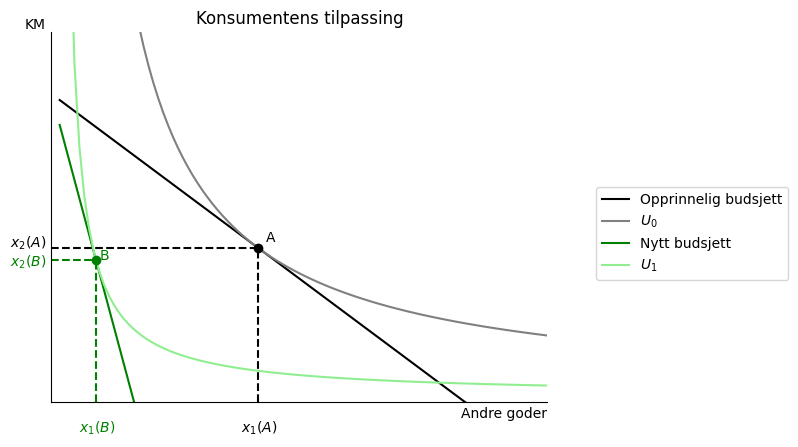

In [145]:
#Beregner nye verdier 
x_1_eq_ny = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 10), (p_2, 2)]))
x_2_eq_ny = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 10), (p_2, 2)]))
nytte_sg_ny = float(V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, 100), (p_1, 10), (p_2, 2)]))


ax.plot(X, budsjett(100, X, 10, 2), color='green', label='Nytt budsjett')
ax.plot(X, ind_k_fn(.5,1,1,X,nytte_sg_ny), color='lightgreen', label='$U_1$')

ax.vlines(x_1_eq_ny, 0, x_2_eq_ny, ls='dashed', color='green')
ax.hlines(x_2_eq_ny, 0, x_1_eq_ny, ls='dashed', color='green')

ax.annotate('$x_1(B)$', (x_1_eq_ny-2, -5), color='green', annotation_clip=False)
ax.annotate('$x_2(B)$', (-5, x_2_eq_ny-1), color= 'green', annotation_clip=False)
ax.annotate('B', (x_1_eq_ny+.5,x_2_eq_ny), color='green')
ax.plot(x_1_eq_ny, x_2_eq_ny , marker='o', color='green')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig1

#[4] Clark, D.J. (2023). Henter 19. mai fra *Forelesning 14 - Konsumentadferd* Github. https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 

Etter innføringen av bompenger kan man se at gode 1, altså antall kilometer kjørt har blitt relativt dyrere i forhold til andre goder. Konsumenten vil tilpasse seg ved å kjøre mindre. Vi ser også at tilfredsheten til konsumenten er på et lavere nivå enn tidligere (U_1) og konsumenten vil tilpasse seg i punkt B. 

Konsumenten vil nå kjøre $x_1$ (B) antall kilometer, som er lavere enn $x_1$ (A) antall kilometer. Vi ser også at konsumenten vil benytte mindre penger på andre goder, fra tidligere $x_2$ (A) til $x_2 $(B). 





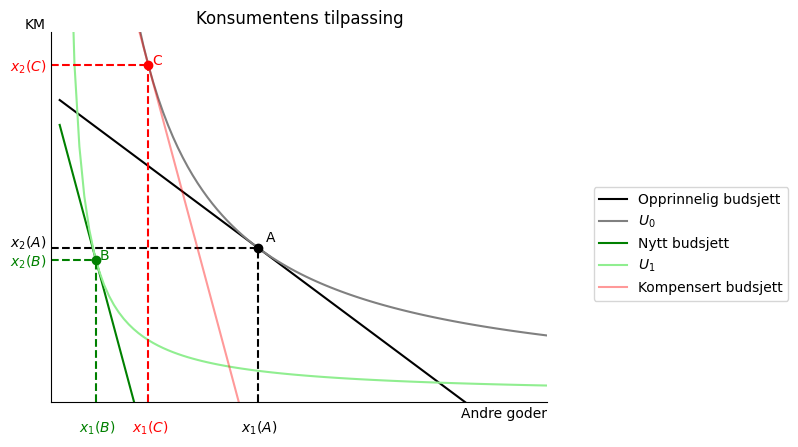

In [146]:
#Fiktiv inntekt
V_m = V.subs([(bta_1, 0.5),(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (p_1, 10), (p_2, 2)])

#Løser V_m=3
sp.solve(V_m-3, m)[0]

#Verdie for godene med denne inntekten
x_1_eq_komp = float(x_1_eq.subs([(bta_1, 0.5), (gma_1, 1), (gma_2, 1), (m, fikt_m), (p_1, 10), (p_2, 2)]))
x_2_eq_komp = float(x_2_eq.subs([(bta_2, 0.5), (gma_1, 1), (gma_2, 1), (m, fikt_m), (p_1, 10), (p_2, 2)]))

#Tegner budsjett som er kompensert
ax.plot(X, budsjett(226.67, X, 10, 2), color='red', alpha=.4, label='Kompensert budsjett')


ax.vlines(x_1_eq_komp, 0, x_2_eq_komp, ls='dashed', color='red')
ax.hlines(x_2_eq_komp, 0, x_1_eq_komp, ls='dashed', color='red')

ax.annotate('$x_1(C)$', (x_1_eq_komp-2, -5), color='red', annotation_clip=False)
ax.annotate('$x_2(C)$', (-5, x_2_eq_komp-1), color= 'red', annotation_clip=False)
ax.annotate('C', (x_1_eq_komp+.5,x_2_eq_komp), color='red')
ax.plot(x_1_eq_komp, x_2_eq_komp , marker='o', color='red')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig1

#[4] Clark, D.J. (2023). Henter 19. mai fra *Forelesning 14 - Konsumentadferd* Github. https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 

Dersom konsumentene skulle blitt kompensert etter innføringen av bompenger for å oppnå samme tilfredshet som tidligere, ville de tilpasset seg annerledes. Dette grunnet den økte kilometersprisen grunnet bompengeavgiften. Konsumentene ville tilpasset seg ved Punkt C. 
De ville kjørt $x_1$ (C) antall kilometer som er lavere enn før innføringen av bompenger. Konsumentene ville også valgt å bruke mer penger på andre goder for å oppnå samme tilfredshet. 

Substisjonseffekten ser man da bilistene velger å kjøre $x_1$ (C) kilometer i stedet for $x_1$ (A) kilometer. Dette grunnet at bilistene substituerer bort å kjøre bil grunnet den relative økte prisen på dette godet. Vi ser også inntektseffekten som viser at bilistene må tilpasse seg ved å bare kjøre $x_1$ (B) kilometer da bilistene ikke blir kompensert. Den totale effekten vil være substisjonseffekten pluss inntektseffekten.

Denne effekten vil gjelde for både for biler med forbrenningsmotor og elbiler, men i noen mindre grad for elbil-bilister.


## 4 Konklusjon

Etter innføringen av bompengeavgiften i Tromsø er det blitt en nedgang i antall bilister de første månedene av 2023. Det er imidlertid tatt seg litt opp igjen, noe som kan tyde på at man ved tid tilpasser seg de nye innføringene og kostnadene som kom. Antall syklister har tatt seg opp som følge av at mindre tar i bruk bilen. Så gjennstår det å se på et lengre perspektiv om det holder seg eller om man går tilbake til gamle vaner. 

Ved bruk av Stone-Geary funksjonen som jeg brukte fant vi ut folk kjører mindre nå enn før, de som kjører i Tromsø har altså tilpasset seg de økte kostnadene som bompengeavgiften påførte, og kanskje heller velger alternative måter å få seg fram på. Enten ved hjelp av sykkel eller kollektiv transport, som hadde en økning i 2023. 

Årsaken til at trafikkbildet endrer seg kan være mye, at folk velger å kanskje ikke ta turen over til Jekta, eller kanskje handler hos sin nærmeste forhandler slik at man slipper å betale avgiften mer enn nødvendig er alle mulige grunner til at det er blitt mindre trafikk på de mest trafikkerte veiene. Men alle kommer som en konsekvens av bompengeavgiften som ble innført.

Det er imidlertig viktig å huske på at det her er kun tall fra de første månedene etter innføringen og mennesker ofte handler impulsivt. Over en lengre periode vil vi få er mer helhetlig bilde over hvordan folk tilpasser seg de nye kostnadene og om hvordan atferden utvikles, da kan man lettere og mer presist se hvordan effekt bompengeavgiften hadde på Tromsø.

## Litteraturliste

### 5.1 Kildeliste


[1] Autopass. (2023). *Om bompengeordningen i Norge*. Hentet 2. mai 2023 fra https://www.autopass.no/no/om-autopass/om-bompengeordningen/

[2] SNL. (2022, 28. Desember). *Bompenger*. Hentet 2. mai 2023 fra https://snl.no/bompenger

[3] Autopass. (2022). *Bompengeprosjekter*. Hentet 3. mai 2023 fra https://www.autopass.no/siteassets/filer-og-vedlegg/veileder-bompengeprosjekter-og-takstretningslinjer/last-ned/veileder-bompengeprosjekter-1.7---juni-2022.pdf

[4] Clark, D.J. (2023). Henter 19. mai fra *Forelesning 14 - Konsumentadferd*. Github. https://github.com/uit-sok-1006-v23/sok1006-notater/blob/main/notater%20forelesning%2014%20med%20l%C3%B8sning.ipynb 

[5] Clark, D.J. (2023) Hentet 25. mai fra *Antall påstigende*. Github. https://github.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/blob/main/data/antall%20p%C3%A5stigende.csv 

### 5.2 Data

Vegvesen. (2023). Trafikkdata. Hentet 3. mai 2023 fra https://www.vegvesen.no/trafikkdata/start/eksport?datatype=DAY&from=2023-04-19&lat=69.667062921797&lon=18.972969608631402&registrationFrequencies=&to=2023-04-20&trafficType=vehicle&zoom=10 